# Fullscan Renders
Outputting the graphs of the data collected by running the robot :) This data is just for viewing purposes, there is a separate notebook for testing the pathfinder modules.

In [1]:
from mpl_toolkits import mplot3d
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [2]:
path = os.path.abspath('..\\')

print("Available test files:")
file_itr = 0
while os.path.exists(path + "\\Scans\\test_%s.json" % file_itr):
    print("\t\\Scans\\test_%s.json" % file_itr)
    file_itr +=1
file_itr = 0
while os.path.exists(path + "\\Debugging Scripts\\test_%s.json" % file_itr):
    print("\t\\Debugging Scripts\\test_%s.json" % file_itr)
    file_itr +=1



Available test files:
	\Scans\test_0.json
	\Scans\test_1.json
	\Scans\test_2.json
	\Scans\test_3.json
	\Scans\test_4.json
	\Scans\test_5.json
	\Debugging Scripts\test_0.json
	\Debugging Scripts\test_1.json


In [3]:
debug_mode = True
save_figs = False
file_no = 5

if save_figs:
    plt.rcParams['figure.dpi'] = 500
else:
    plt.rcParams['figure.dpi'] = 200

In [17]:
# current_file = r"\Debugging Scripts\test_%s.json" % file_no
current_file = r"\Scans\test_%s.json" % file_no
path = os.path.abspath('..\\') + current_file

if debug_mode:
    print(path)

with open(path, 'r') as infile:
    json_data = json.load(infile)

r_o_m = json_data["range of motion"]
resolution = json_data["resolution"]
point_mags = json_data["points"]
max_point = json_data["max_point"]

if debug_mode:
    for i in json_data.keys():
        if i != "points":
            print(f"{i}: {json_data[i]}")
    # print(point_mags[0])
    # print(max_point)
    # print(resolution)
    # print(r_o_m)

c:\Users\ander\Documents\COBOT-Transducer-Control-Code\Rebuilding_Everything\Scans\test_5.json
range of motion: {'X': [0, 0], 'Y': [0, 0], 'Z': [-25.0, 15.0], 'Rx': [-16, 16], 'Ry': [-16, 16], 'Rz': [0, 0]}
resolution: [0.8, 1]
max_point: [[[0.0, 0.0, -5.0], [1.0, 5.0, 0.0]], 594.043]


In [18]:
Zs = []
Rxs = []
Rys = []
mags = []

for p in point_mags:
    Zs.append(p[0][0][2])
    Rxs.append(p[0][1][0])
    Rys.append(p[0][1][1])
    mags.append(p[1])


Maximum magnitude:  594.043
Minimum magnitude: 24.72


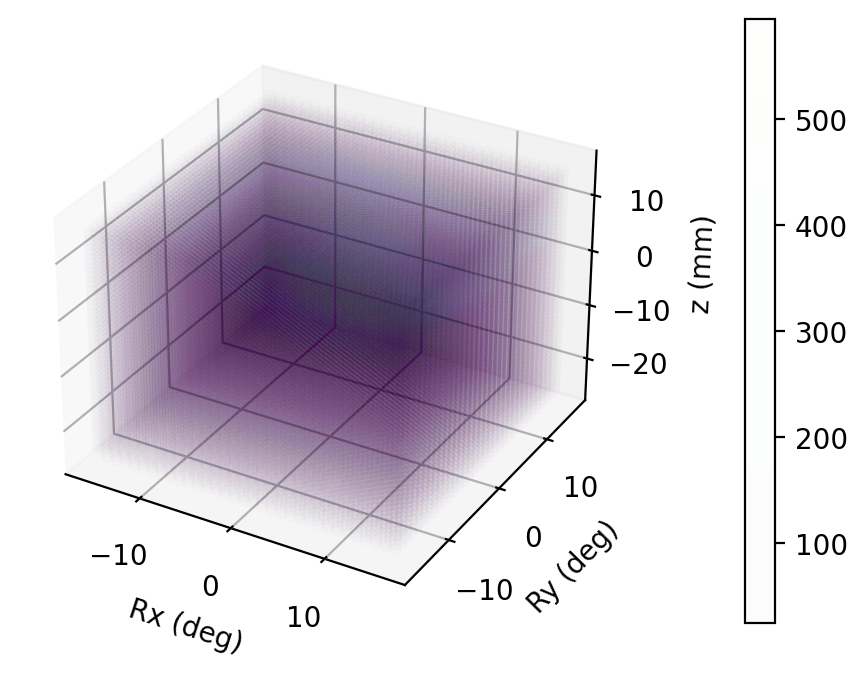

594.043


In [19]:
ax = plt.axes(projection='3d')

if debug_mode:
    print(f"Maximum magnitude:  {max(mags)}")
    print(f"Minimum magnitude: {min(mags)}")


# floor = min(mags)
# span = max(mags) - floor
# als = [round((i - floor) / (span * 2) * 256) for i in mags]
# als = np.array([i / 256 for i in als])

fig = ax.scatter(Rxs, Rys, Zs, c=mags, cmap='viridis', alpha=0.01, linewidth=0.25)

ax.set_xlabel("Rx (deg)")
ax.set_ylabel("Ry (deg)")
ax.set_zlabel("z (mm)")

plt.colorbar(fig, pad=0.13)
if save_figs:
    plt.savefig("fullscan_render_test_%s.jpg" % current_file, dpi=400)
plt.show()
# plt.axes(projection = "3d")
# plt.scatter(Rxs, Rys, Zs, c=mags, cmap='viridis', alpha=0.8, linewidth=0.5)

print(max(mags))


In [20]:
# Gonna find the set of Rxs and Rys corresponding only to the Z value found at the max point
# Then do the same for the other guys
r = dict()
active_rom = []
for DoF in r_o_m:
    r[DoF] = (r_o_m[DoF][1] - r_o_m[DoF][0]) / 2
    if r[DoF] != 0.0:
        active_rom.append(DoF)


indeces = {'X': (0,0), 'Y': (0,1), 'Z': (0,2), 'Rx': (1,0), 'Ry': (1,1), 'Rz': (1,2)}
points = np.array([[p[0][indeces[a][0]][indeces[a][1]] for a in active_rom] for p in point_mags])
magss = np.array([mags])
magss = magss.T


np_point_mags = np.hstack((points,magss))

# "mps" stands for "max points," or all the points in Rx/Ry space that occur at the max
# value of Z, rotated for each of the other dimensions
mp = max_point[0]
print(mp)

zmps = np_point_mags[np_point_mags[:,0] == mp[indeces['Z'][0]][indeces['Z'][1]]]
Rxmps = np_point_mags[np_point_mags[:,1] == mp[indeces['Rx'][0]][indeces['Rx'][1]]]
Rymps = np_point_mags[np_point_mags[:,2] == mp[indeces['Ry'][0]][indeces['Ry'][1]]]

if debug_mode:
    print(f"Active range of motion: {active_rom}")
    print(f"Shape of points array: {points.shape}")
    print(f"Shape of magnitudes array: {magss.shape} \n(Should be 1-D, same length as points array)")
    print(f"Tenth point_mag item (representative): {np_point_mags[10]}")
    print(f"Testing the Z-max-points array: {zmps[:,1][0]}")
    print(f"Maximum point: {max_point}")

[[0.0, 0.0, -5.0], [1.0, 5.0, 0.0]]
Active range of motion: ['Z', 'Rx', 'Ry']
Shape of points array: (55525, 3)
Shape of magnitudes array: (55525, 1) 
(Should be 1-D, same length as points array)
Tenth point_mag item (representative): [-25.    -16.     -5.     32.197]
Testing the Z-max-points array: -16.0
Maximum point: [[[0.0, 0.0, -5.0], [1.0, 5.0, 0.0]], 594.043]


In [21]:
# foo_isolated_mps refers to the points along the isolated foo axis when the other axes are at their optimal values
z_isolated_mps = np_point_mags[np.all([np_point_mags[:,1] == mp[indeces['Rx'][0]][indeces['Rx'][1]], np_point_mags[:,2] == mp[indeces['Ry'][0]][indeces['Ry'][1]]],axis=0)]
Rx_isolated_mps = np_point_mags[np.all([np_point_mags[:,0] == mp[indeces['Z'][0]][indeces['Z'][1]], np_point_mags[:,2] == mp[indeces['Ry'][0]][indeces['Ry'][1]]],axis=0)]
Ry_isolated_mps = np_point_mags[np.all([np_point_mags[:,0] == mp[indeces['Z'][0]][indeces['Z'][1]], np_point_mags[:,1] == mp[indeces['Rx'][0]][indeces['Rx'][1]]],axis=0)]

if debug_mode:
    # print(z_isolated_mps)
    print(Rx_isolated_mps)
    # print(Ry_isolated_mps)
    pass

[[ -5.    -16.      5.     29.756]
 [ -5.    -15.      5.     29.756]
 [ -5.    -14.      5.     32.197]
 [ -5.    -13.      5.     37.233]
 [ -5.    -12.      5.     32.197]
 [ -5.    -11.      5.     44.71 ]
 [ -5.    -10.      5.     69.582]
 [ -5.     -9.      5.     86.978]
 [ -5.     -8.      5.    121.769]
 [ -5.     -7.      5.    161.443]
 [ -5.     -6.      5.    193.793]
 [ -5.     -5.      5.    241.096]
 [ -5.     -4.      5.    305.643]
 [ -5.     -3.      5.    372.784]
 [ -5.     -2.      5.    437.483]
 [ -5.     -1.      5.    502.029]
 [ -5.      0.      5.    529.344]
 [ -5.      1.      5.    594.043]
 [ -5.      2.      5.    541.856]
 [ -5.      3.      5.    549.333]
 [ -5.      4.      5.    484.634]
 [ -5.      5.      5.    454.878]
 [ -5.      6.      5.    370.342]
 [ -5.      7.      5.    320.597]
 [ -5.      8.      5.    263.375]
 [ -5.      9.      5.    213.63 ]
 [ -5.     10.      5.    146.641]
 [ -5.     11.      5.    114.292]
 [ -5.     12.      

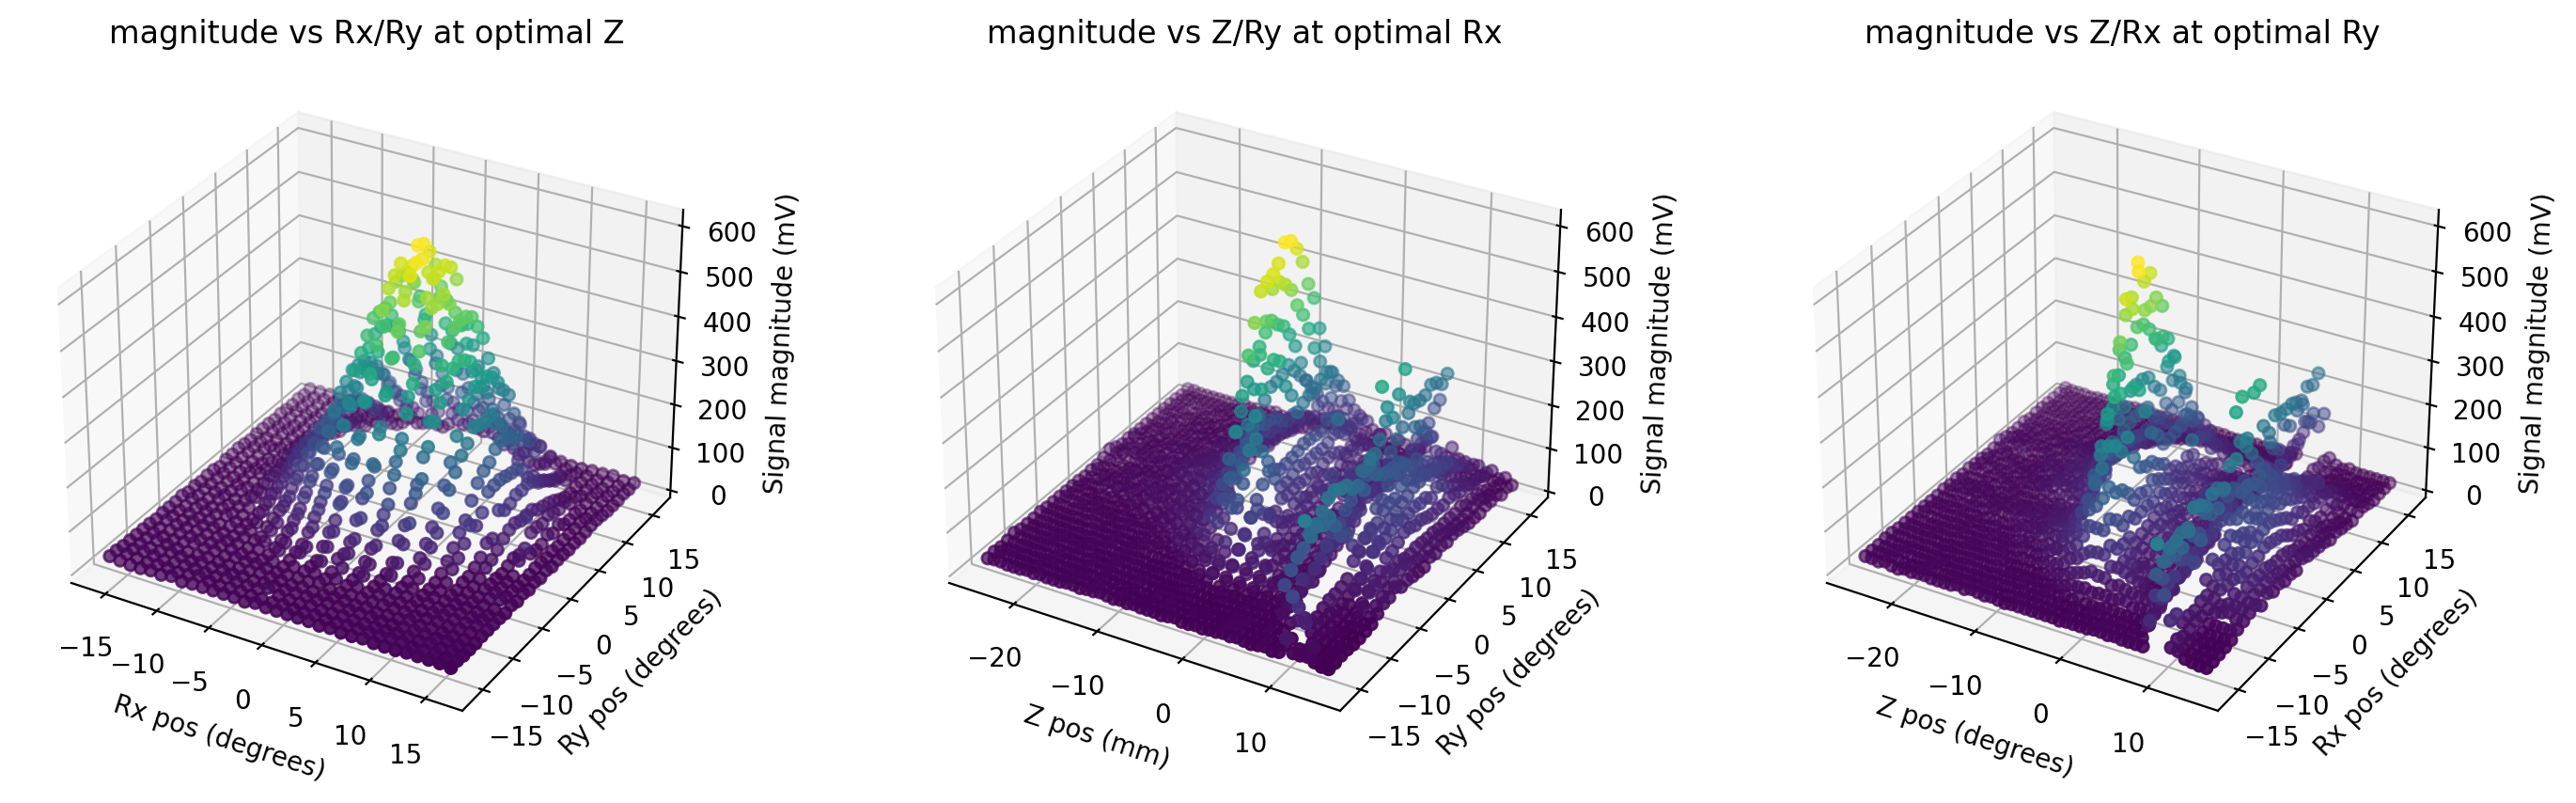

In [22]:
fig2 = plt.figure(figsize=(14,4), constrained_layout=True)
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": ["Palatino"],
# })

tax = fig2.add_subplot(1,3,1, projection='3d')
# tax.plot_trisurf(zmps[:,1], zmps[:,2], zmps[:,3], cmap='viridis')
tax.scatter3D(zmps[:,1], zmps[:,2], zmps[:,3],c=zmps[:,3], cmap='viridis')
# tax.plot3D(Rx_isolated_mps[:,1], Rx_isolated_mps[:,2], Rx_isolated_mps[:,3], c='g')
# tax.plot3D(Ry_isolated_mps[:,1], Ry_isolated_mps[:,2], Ry_isolated_mps[:,3], c='b')
tax.set_title("magnitude vs Rx/Ry at optimal Z")
tax.set_xlabel("Rx pos (degrees)")
tax.set_ylabel("Ry pos (degrees)")
tax.set_zlabel("Signal magnitude (mV)")

tax = fig2.add_subplot(1,3,2, projection='3d')
# tax.plot_trisurf(Rxmps[:,0], Rxmps[:,2], Rxmps[:,3], cmap='viridis')
tax.scatter(Rxmps[:,0], Rxmps[:,2], Rxmps[:,3],c=Rxmps[:,3], cmap='viridis')
# tax.plot3D(z_isolated_mps[:,0], z_isolated_mps[:,2], z_isolated_mps[:,3], c='r')
# tax.plot3D(Ry_isolated_mps[:,0], Ry_isolated_mps[:,2], Ry_isolated_mps[:,3], c='b')
tax.set_title("magnitude vs Z/Ry at optimal Rx")
tax.set_xlabel("Z pos (mm)")
tax.set_ylabel("Ry pos (degrees)")
tax.set_zlabel("Signal magnitude (mV)")

tax = fig2.add_subplot(1,3,3, projection='3d')
# tax.plot_trisurf(Rymps[:,0], Rymps[:,1], Rymps[:,3], cmap='viridis')
tax.scatter(Rymps[:,0], Rymps[:,1], Rymps[:,3],c=Rymps[:,3], cmap='viridis')
# tax.plot3D(z_isolated_mps[:,0], z_isolated_mps[:,1], z_isolated_mps[:,3], c='r')
# tax.plot3D(Rx_isolated_mps[:,0], Rx_isolated_mps[:,1], Rx_isolated_mps[:,3], c='g')
tax.set_title("magnitude vs Z/Rx at optimal Ry")
tax.set_xlabel("Z pos (degrees)")
tax.set_ylabel("Rx pos (degrees)")
tax.set_zlabel("Signal magnitude (mV)")

plt.show()

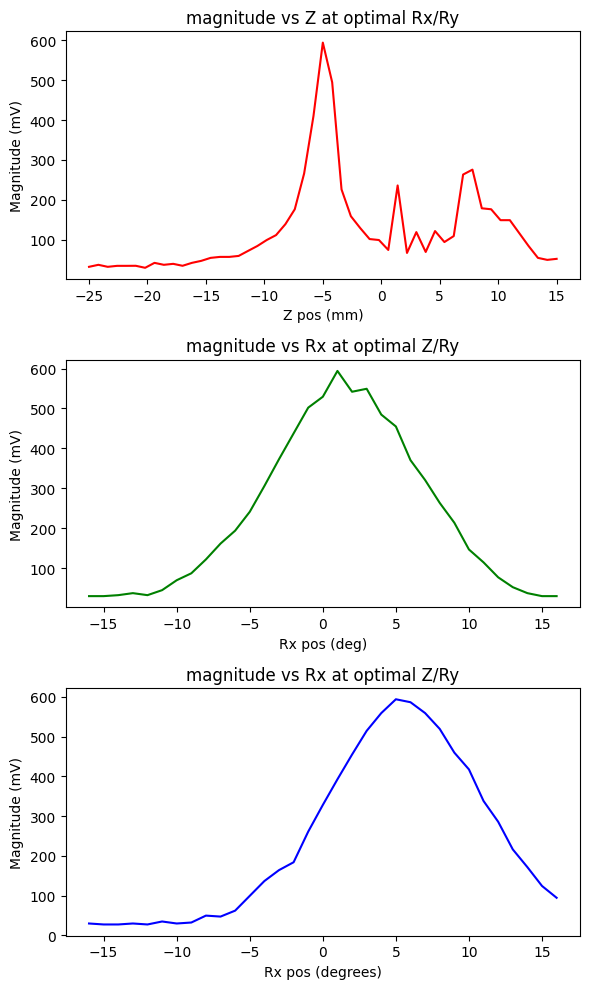

In [23]:
fig3 = plt.figure(figsize=(6,10), dpi=100)
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.8, 
#                     hspace=0.4)

# plt.subplots_adjust(hspace=0.5)

# plt.rcParams.update({'font.size': 10})

tax = fig3.add_subplot(311)
tax.plot(z_isolated_mps[:,0],z_isolated_mps[:,3], c='r')
tax.set_title("magnitude vs Z at optimal Rx/Ry")
tax.set_xlabel("Z pos (mm)")
tax.set_ylabel("Magnitude (mV)")

tax = fig3.add_subplot(312)
tax.plot(Rx_isolated_mps[:,1],Rx_isolated_mps[:,3], c='g')
tax.set_title("magnitude vs Rx at optimal Z/Ry")
tax.set_xlabel("Rx pos (deg)")
tax.set_ylabel("Magnitude (mV)")

tax = fig3.add_subplot(313)
tax.plot(Ry_isolated_mps[:,2],Ry_isolated_mps[:,3], c='b')
tax.set_title("magnitude vs Rx at optimal Z/Ry")
tax.set_xlabel("Rx pos (degrees)")
tax.set_ylabel("Magnitude (mV)")

fig3.tight_layout()